<a href="https://colab.research.google.com/github/leofsouza/modelo_regressao/blob/main/Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [6]:
investimento_plataformas = pd.read_excel("/content/MKT.xlsx")

In [7]:
investimento_plataformas.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [8]:
investimento_plataformas.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [9]:
investimento_plataformas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


#Análise Descritiva

In [10]:
investimento_plataformas[["youtube","facebook","newspaper","sales"]].describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [14]:
investimento_plataformas.isnull()

,youtube,facebook,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
166,False,False,False,False
167,False,False,False,False
168,False,False,False,False
169,False,False,False,False


#Análise Exploratória (Gráficos de barras utilizando Seaborn)


In [47]:
import seaborn as ans

In [31]:
agg_investimento_yt = investimento_plataformas.groupby(["youtube"])["sales"].agg("mean").reset_index()

<Axes: xlabel='youtube', ylabel='sales'>

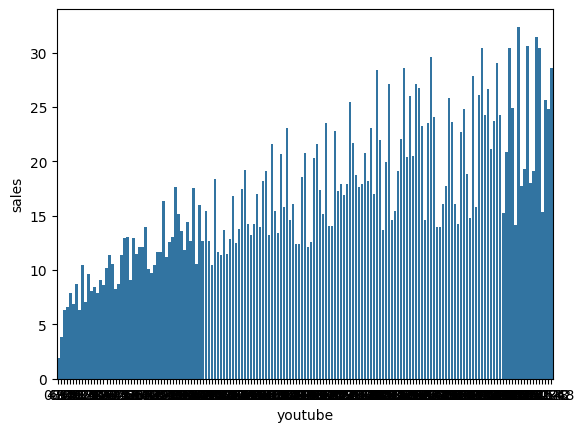

In [46]:
ans.barplot(data=agg_investimento_yt,x="youtube",y="sales")

<Axes: xlabel='facebook', ylabel='sales'>

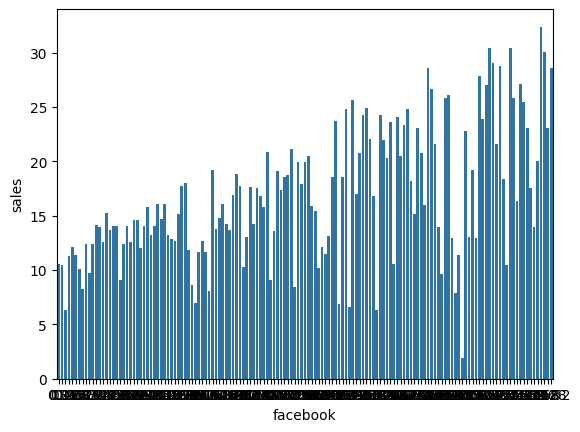

In [33]:
agg_investimento_fb = investimento_plataformas.groupby(["facebook"])["sales"].agg("mean").reset_index()
ans.barplot(data=agg_investimento_fb,x="facebook",y="sales")

<Axes: xlabel='newspaper', ylabel='sales'>

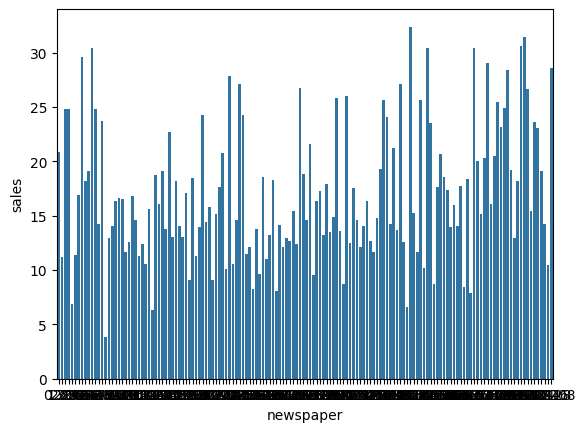

In [35]:
agg_investimento_np = investimento_plataformas.groupby(["newspaper"])["sales"].agg("mean").reset_index()
ans.barplot(data=agg_investimento_np,x="newspaper",y="sales")

In [36]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.0 MB/s eta 0:00:00


In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px

#Análise Descritiva (Describe em Gráficos)

In [40]:
fig = px.box(investimento_plataformas, x="sales")
fig.update_traces(line_color="blue")

In [41]:
fig = px.box(investimento_plataformas, x="facebook")
fig.update_traces(line_color="blue")

In [43]:
fig = px.box(investimento_plataformas, x="youtube")
fig.update_traces(line_color="blue")

In [44]:
fig = px.box(investimento_plataformas, x="newspaper")
fig.update_traces(line_color="blue")

#Análises Estatísticas

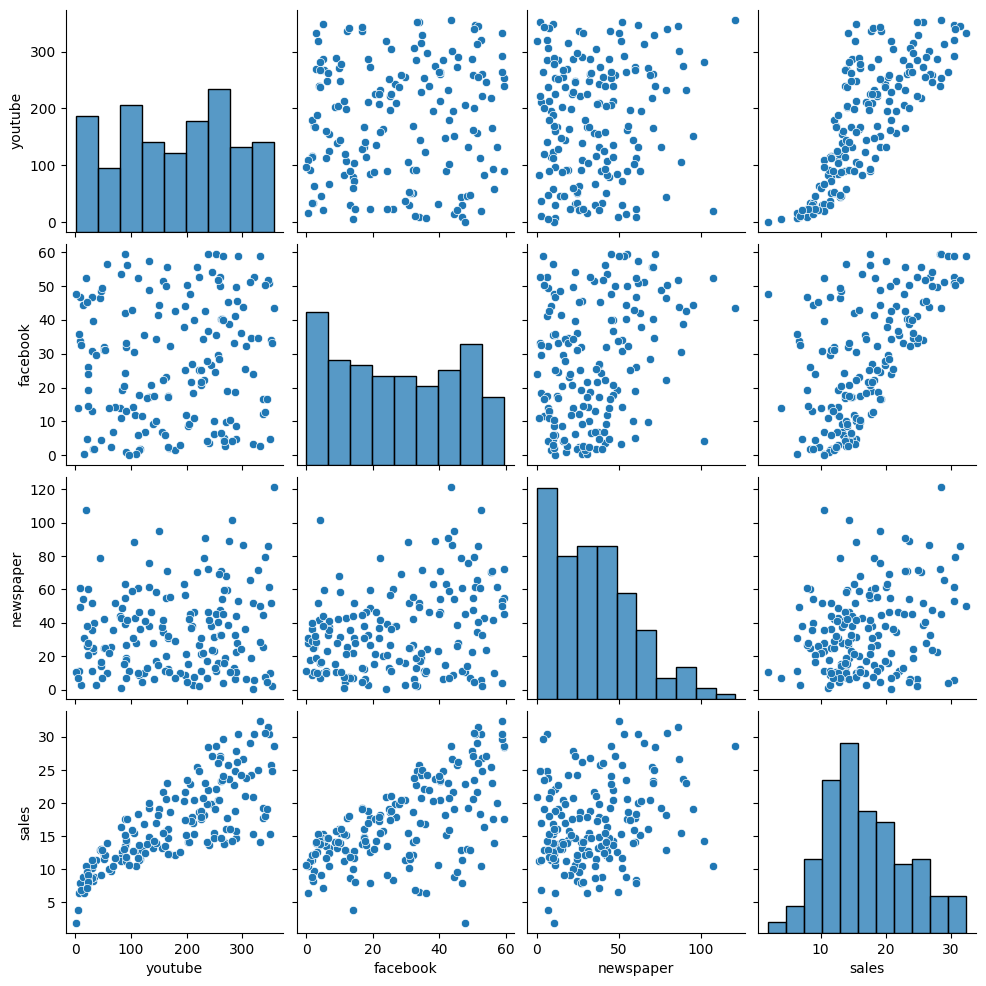

In [49]:
sns.pairplot(investimento_plataformas)

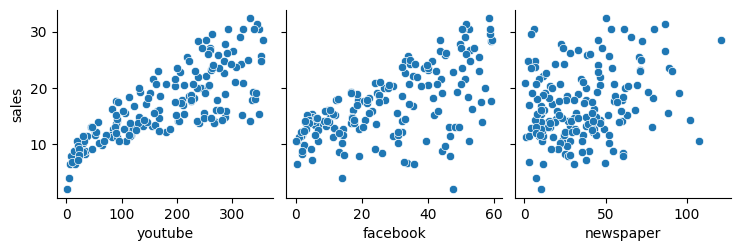

In [52]:
sns.pairplot(investimento_plataformas, x_vars=["youtube","facebook","newspaper"],y_vars="sales")

 #CORRELAÇÃO pelas Vendas

In [53]:
investimento_plataformas.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

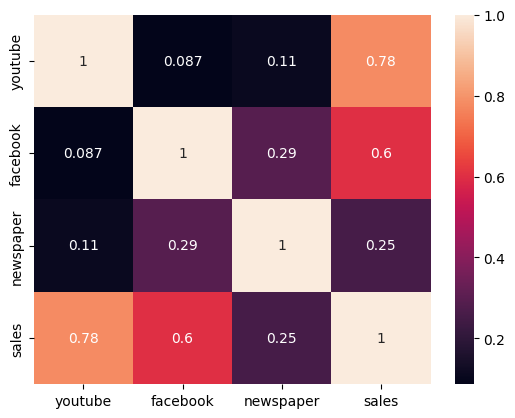

In [54]:
sns.heatmap(investimento_plataformas.corr(), annot=True)

<Axes: xlabel='sales', ylabel='Count'>

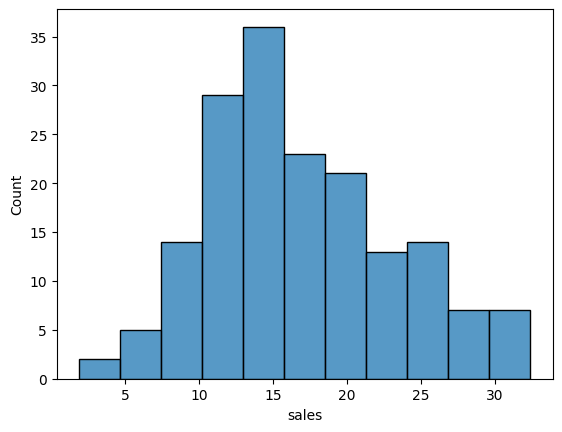

In [55]:
sns.histplot(investimento_plataformas["sales"])

In [92]:
investimento_plataformas.count()

youtube      171
facebook     171
newspaper    171
sales        171
dtype: int64

#Predição Preço. Variaveis X explicativas e Y.

In [56]:
investimento_plataformas.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [78]:
X = investimento_plataformas[['youtube','facebook','newspaper']]
Y = investimento_plataformas[["sales"]]

#treinar o modelo

In [74]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


#treinar os dados com Regressao Linear

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lm = LinearRegression()

In [84]:
lm.fit(X_train, Y_train)

LinearRegression()

In [85]:
Y_pred = lm.predict(X_test)

In [86]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, Y_pred)

In [87]:
print("r_quadrado", r)

r_quadrado 0.882423505618885


In [88]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Vendas')

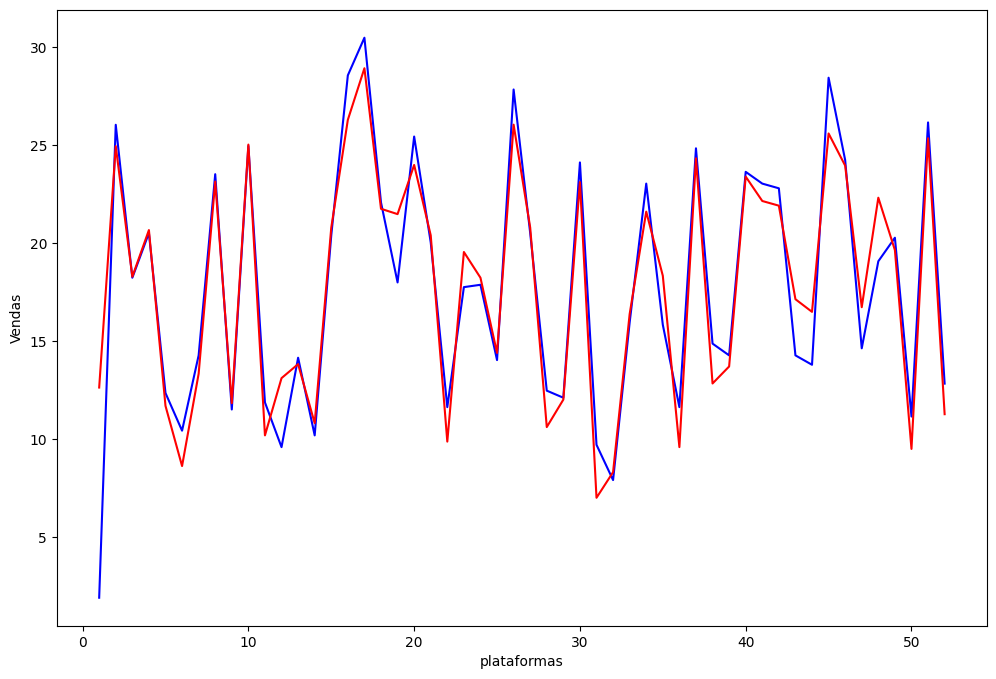

In [100]:
c = [i for i in range(1,53, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, Y_pred, color="red")
plt.xlabel("plataformas")
plt.ylabel("Vendas")

In [102]:
investimento_plataformas.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [103]:
#Predição
youtube=180
facebook=35
newspaper= 40
entrada = [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([18.38211773])